Test the saved models

In [10]:
import os
import joblib
import numpy as np
import pandas as pd
import json
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [8]:
BEST_FEATURE_SETS = 'results/best_feature_sets.json'
MODELS_DIR = 'models'
FEATURES_DIR = 'extracted_features'
RESULTS_DIR = 'results'

In [11]:
with open(BEST_FEATURE_SETS, 'r') as f:
    models_best_feature_sets = json.load(f)

In [15]:
models_summary_list = []

for dataset_name, models_info in models_best_feature_sets.items():
    print('\n' + '#'*80)
    print(f'testing started for {dataset_name}')
    print('#'*80)

    # test svm, lgbm, mlp for dataset

    for model_name, config in models_info.items():
        print('\n\n' + '-'*80)
        print(f'testing {model_name} on {dataset_name}')
        print('-'*60)

        best_feature_set = config['best_feature_set']
        feature_path = os.path.join(FEATURES_DIR, f"{best_feature_set}.npz")
        with np.load(feature_path, allow_pickle=True) as data:
            X, y = data['features'], data['labels']
        
        model_path = os.path.join(MODELS_DIR, f'{dataset_name}_{model_name}_best_model.pkl')
        if not os.path.exists(model_path):
            print(f'\n{model_path} not found. skipping...')
            continue
        
        pipeline = joblib.load(model_path)
        
        _, X_test, _, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
        
        y_pred = pipeline.predict(X_test)
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        accuracy = report_dict['accuracy']
        
        print(f'{model_name} with {best_feature_set} accuracy: {accuracy:.4f}')
        
        models_summary_list.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Best Feature Set': best_feature_set,
            'Accuracy': accuracy,
            'F1-Score (Macro)': report_dict['macro avg']['f1-score'],
            'Precision (Macro)': report_dict['macro avg']['precision'],
            'Recall (Macro)': report_dict['macro avg']['recall'],
        })


# prepare a comparison table

print('\n\n' + '#'*80)
print("Comparison table for all combinations")
print('#'*80 + '\n')

df_comparison = pd.DataFrame(models_summary_list)
df_comparison = df_comparison.sort_values(by=['Dataset', 'Model', 'Accuracy'], ascending=[True, True, False])
    
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1200)

print(df_comparison.to_string(index=False))
    
comparison_table_path = os.path.join(RESULTS_DIR, 'full_test_comparison_summary.csv')
df_comparison.to_csv(comparison_table_path, index=False)
print(f'\ncomparison for all models saved to {comparison_table_path}')


################################################################################
testing started for dataset1
################################################################################


--------------------------------------------------------------------------------
testing SVM on dataset1
------------------------------------------------------------


d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from ve

SVM with dataset1_hog16x16_lbp12p2r accuracy: 0.6519


--------------------------------------------------------------------------------
testing LGBM on dataset1
------------------------------------------------------------


d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBM with dataset1_hog16x16_lbp8p1r accuracy: 0.5659


--------------------------------------------------------------------------------
testing MLP on dataset1
------------------------------------------------------------
MLP with dataset1_hog16x16_lbp12p2r accuracy: 0.6045

################################################################################
testing started for dataset2
################################################################################


--------------------------------------------------------------------------------
testing SVM on dataset2
------------------------------------------------------------


d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from ve

SVM with dataset2_hog16x16_lbp12p2r accuracy: 0.7356


--------------------------------------------------------------------------------
testing LGBM on dataset2
------------------------------------------------------------


d:\VSCode Projects\weather-image-classification\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBM with dataset2_hog16x16_lbp12p2r accuracy: 0.6651


--------------------------------------------------------------------------------
testing MLP on dataset2
------------------------------------------------------------
MLP with dataset2_hog16x16_lbp12p2r accuracy: 0.7083


################################################################################
Comparison table for all combinations
################################################################################

 Dataset Model           Best Feature Set  Accuracy  F1-Score (Macro)  Precision (Macro)  Recall (Macro)
dataset1  LGBM  dataset1_hog16x16_lbp8p1r  0.565914          0.539157           0.581773        0.523871
dataset1   MLP dataset1_hog16x16_lbp12p2r  0.604516          0.585296           0.598129        0.578713
dataset1   SVM dataset1_hog16x16_lbp12p2r  0.651857          0.639400           0.659894        0.629254
dataset2  LGBM dataset2_hog16x16_lbp12p2r  0.665064          0.664110           0.665982        0.6674

Now, let's demonstrate a test for a single image

In [12]:
import random
import cv2
import matplotlib.pyplot as plt
from ipynb.fs.full.feature_extraction import extract_all_features_for_image


d:\VSCode-Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode-Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode-Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from ve

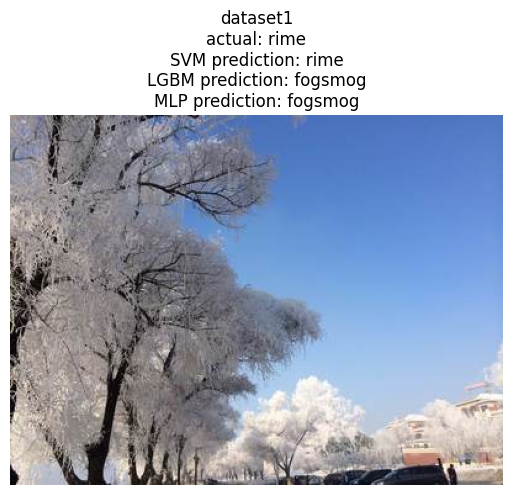

d:\VSCode-Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode-Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\VSCode-Projects\weather-image-classification\.venv\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from ve

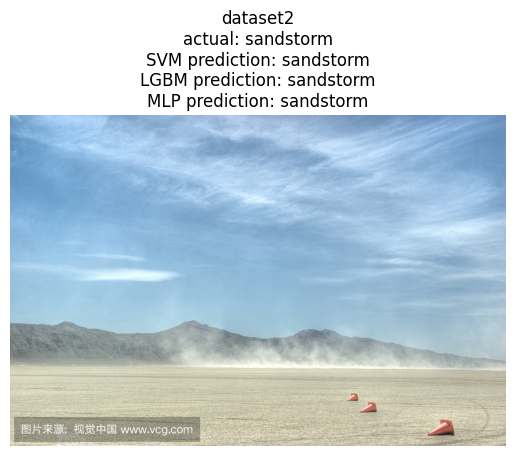

In [26]:
for dataset_name, models_info in models_best_feature_sets.items():
    sample_dataset_path = os.path.join('data', dataset_name)
    class_names = [d for d in os.listdir(sample_dataset_path)]
    random_class = random.choice(class_names)

    random_image_name = random.choice(os.listdir(os.path.join(sample_dataset_path, random_class)))
    random_image_path = os.path.join(sample_dataset_path, random_class, random_image_name)

    image = cv2.imread(random_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (128, 128))

    predictions = {}

    for model_name, config in models_info.items():
        pipeline = joblib.load(os.path.join(MODELS_DIR, f'{dataset_name}_{model_name}_best_model.pkl'))

        best_feature_set = config['best_feature_set']
        parts = best_feature_set.split('_')
        hog_w, hog_h = map(int, parts[1].replace('hog', '').split('x'))
        lbp_p_str, lbp_r_str = parts[2].replace('lbp', '').split('p')
        lbp_p = int(lbp_p_str)
        lbp_r = int(lbp_r_str.replace('r', ''))

        feature_vector = extract_all_features_for_image(
            image_resized, hog_pixels=(hog_w, hog_h), lbp_points=lbp_p, lbp_radius=lbp_r
        )

        prediction_index = pipeline.predict(feature_vector.reshape(1, -1))[0]
        predicted_class = class_names[prediction_index]
        predictions[model_name] = predicted_class

    plt.imshow(image_rgb)
    plt.title(f'{dataset_name}\nactual: {random_class}\nSVM prediction: {predictions["SVM"]}\nLGBM prediction: {predictions["LGBM"]}\nMLP prediction: {predictions["MLP"]}')
    plt.axis('off')
    plt.show()

